<a href="https://colab.research.google.com/github/cwwade04/CIS-3902-Data-Mining/blob/main/cis3902finalproject_wade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# AutoViz
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

# PyCaret
!pip install pycaret
from pycaret.classification import *

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/cis3902/videogamessales.csv'
games = pd.read_csv(file_path)

In [ ]:
# Create a new target column 'Hit_Flop':
# Games with more than 1 million global sales are labeled 'Hit', others as 'Flop'
games['Hit_Flop'] = games['Global_Sales'].apply(lambda x: 'Hit' if x > 1.0 else 'Flop')

In [ ]:
# Drop any rows missing values in critical columns to ensure clean training data
games.dropna(subset=['Genre', 'Platform', 'Publisher', 'Global_Sales'], inplace=True)

In [ ]:
# Keep only the relevant features and the target variable for modeling
df_model = games[['Genre', 'Platform', 'Publisher', 'Hit_Flop']]

In [ ]:
# Import PyCaret
# handles preprocessing like encoding, splitting, and imputation
from pycaret.classification import *
clf1 = setup(data=df_model, target='Hit_Flop', session_id=42)

,Description,Value
0,Session id,42
1,Target,Hit_Flop
2,Target type,Binary
3,Target mapping,"Flop: 0, Hit: 1"
4,Original data shape,"(16540, 4)"
5,Transformed data shape,"(16540, 15)"
6,Transformed train set shape,"(11578, 15)"
7,Transformed test set shape,"(4962, 15)"
8,Categorical features,3
9,Preprocess,True


In [ ]:
# Create Random Forest model
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.8104,0.8800,0.8538,0.8578,0.2614,0.2912
1,0.8834,0.8175,0.8834,0.8683,0.8733,0.3729,0.3822
2,0.8705,0.7858,0.8705,0.8508,0.8578,0.2962,0.3054
3,0.8653,0.8009,0.8653,0.8391,0.8481,0.2357,0.2482
4,0.8696,0.8025,0.8696,0.8455,0.8533,0.2629,0.2763
5,0.8756,0.8122,0.8756,0.8560,0.8623,0.3147,0.3265
6,0.8610,0.7833,0.8610,0.8411,0.8490,0.2576,0.2639
7,0.8722,0.8279,0.8722,0.8464,0.8538,0.2585,0.2760
8,0.8773,0.8438,0.8773,0.8533,0.8594,0.2827,0.3022


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# visually inspect model performance
evaluate_model(rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Run predictions to evaluate performance
predict_model(rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8706,0.7941,0.8706,0.8472,0.8548,0.2696,0.2827


,Genre,Platform,Publisher,Hit_Flop,prediction_label,prediction_score
14192,Misc,DS,Nintendo,Flop,Flop,0.7440
14629,Strategy,PSP,Sony Computer Entertainment,Flop,Flop,1.0000
1621,Platform,GBA,THQ,Hit,Flop,0.8800
10181,Sports,X360,Atari,Flop,Flop,0.9967
2537,Puzzle,SNES,Hudson Soft,Flop,Flop,1.0000
...,...,...,...,...,...,...
10315,Misc,PS,Midway Games,Flop,Flop,0.9717
1006,Sports,PS2,Konami Digital Entertainment,Hit,Flop,0.8739
13237,Action,GBA,THQ,Flop,Flop,0.9157
1005,Shooter,XB,Activision,Hit,Flop,0.7352


In [ ]:
# Tune the Random Forest model
tuned_rf = tune_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8817,0.8251,0.8817,0.8809,0.8325,0.0807,0.1905
1,0.8826,0.8612,0.8826,0.8697,0.8372,0.1099,0.2091
2,0.8869,0.8035,0.8869,0.8820,0.8468,0.1723,0.2809
3,0.8748,0.8147,0.8748,0.8261,0.8249,0.0477,0.0980
4,0.8800,0.8174,0.8800,0.8585,0.8335,0.0960,0.1834
5,0.8851,0.8504,0.8851,0.8746,0.8444,0.1597,0.2603
6,0.8817,0.8011,0.8817,0.8743,0.8346,0.1002,0.2059
7,0.8756,0.8314,0.8756,0.8341,0.8309,0.0858,0.1430
8,0.8747,0.8414,0.8747,0.8260,0.8283,0.0648,0.1129


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# evaluate the tuned model visually
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Run predictions to evaluate performance
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8809,0.8255,0.8809,0.8576,0.8370,0.1148,0.1987


,Genre,Platform,Publisher,Hit_Flop,prediction_label,prediction_score
14192,Misc,DS,Nintendo,Flop,Flop,0.7284
14629,Strategy,PSP,Sony Computer Entertainment,Flop,Flop,0.9245
1621,Platform,GBA,THQ,Hit,Flop,0.8995
10181,Sports,X360,Atari,Flop,Flop,0.8612
2537,Puzzle,SNES,Hudson Soft,Flop,Flop,0.9133
...,...,...,...,...,...,...
10315,Misc,PS,Midway Games,Flop,Flop,0.9403
1006,Sports,PS2,Konami Digital Entertainment,Hit,Flop,0.9255
13237,Action,GBA,THQ,Flop,Flop,0.9407
1005,Shooter,XB,Activision,Hit,Flop,0.8793


In [ ]:
# --- Confusion Matrix ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Store predictions for rf model
predictions = predict_model(rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8706,0.7941,0.8706,0.8472,0.8548,0.2696,0.2827


In [ ]:
# Actual and predicted labels
y_true = predictions['Hit_Flop']
y_pred = predictions['prediction_label']

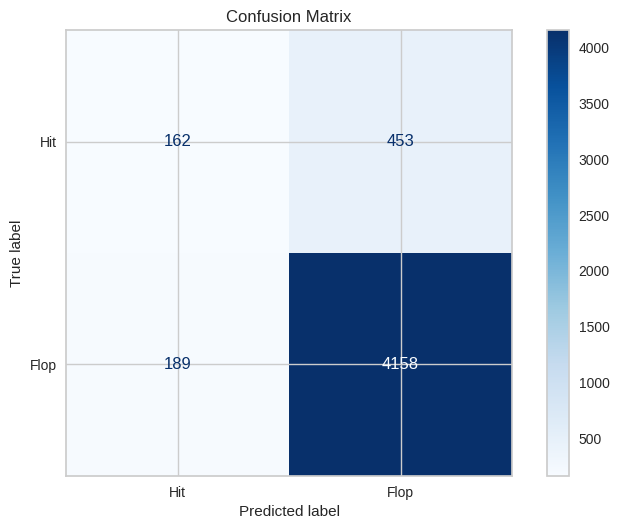

In [ ]:
# Show confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['Hit', 'Flop'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Hit', 'Flop'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8809,0.8255,0.8809,0.8576,0.8370,0.1148,0.1987


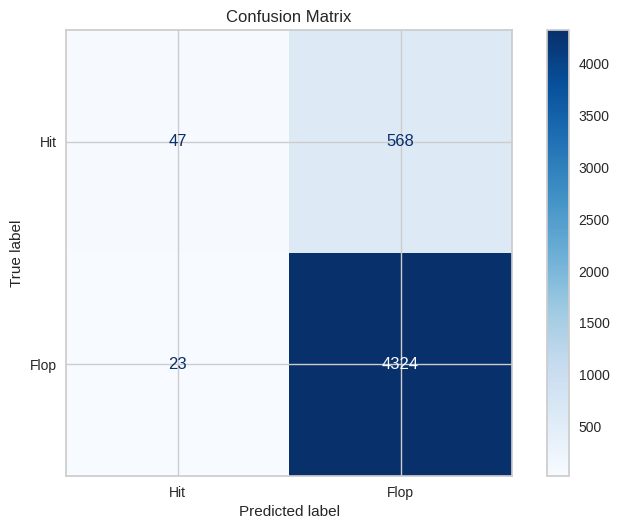

In [ ]:
# Store predictions for tuned_model
predictions = predict_model(tuned_rf)
y_true = predictions['Hit_Flop']
y_pred = predictions['prediction_label']
cm = confusion_matrix(y_true, y_pred, labels=['Hit', 'Flop'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Hit', 'Flop'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# --- Bar chart: Hits vs Flops ---
import seaborn as sns

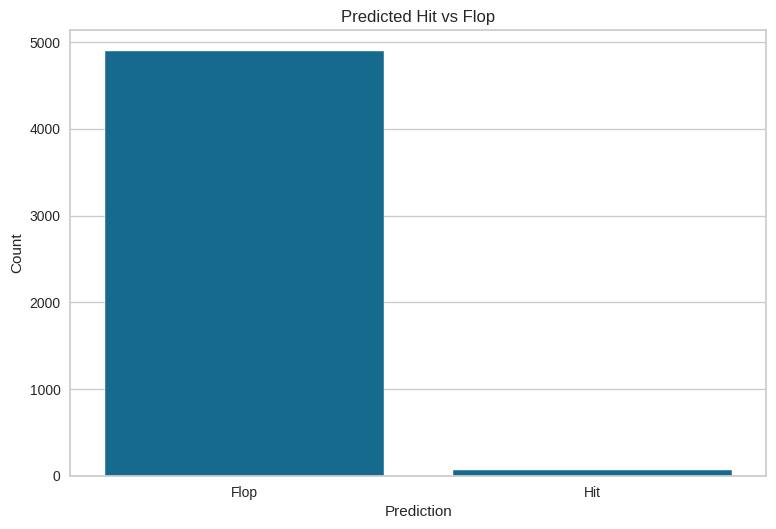

In [ ]:
# Count predicted Hits and Flops
sns.countplot(x='prediction_label', data=predictions)
plt.title("Predicted Hit vs Flop")
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.show()

In [ ]:
# --- Stacked bar chart: Hits and Flops by Genre ---

# Combine original data with predictions
merged = pd.concat([df_model.reset_index(drop=True), predictions['prediction_label']], axis=1)

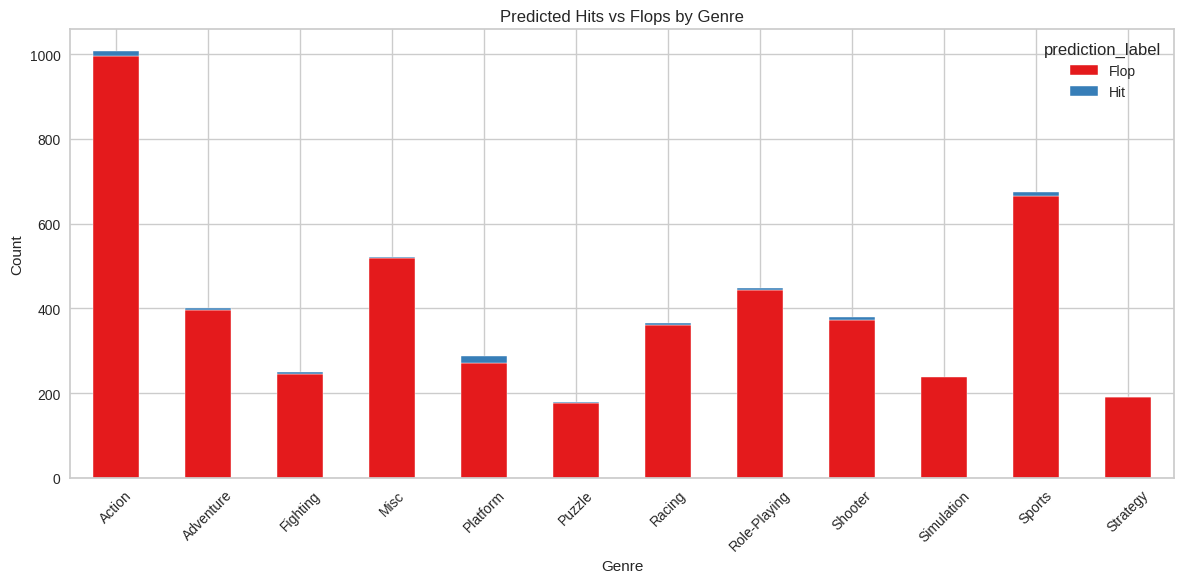

In [ ]:
# Count predictions for each genre
merged.groupby(['Genre', 'prediction_label']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(12,6)
)
plt.title("Predicted Hits vs Flops by Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

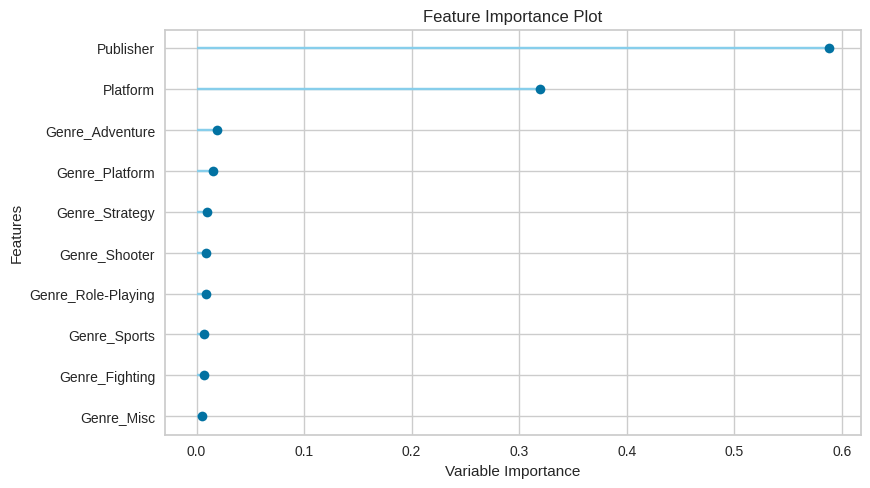

In [ ]:
# --- Feature Importance ---
# Show which features mattered most
plot_model(tuned_rf, plot='feature')

In [ ]:
AV = AutoViz_Class()

In [ ]:
file_path = '/content/drive/MyDrive/cis3902/videogamessales.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(file_path)
df['Hit_Flop'] = df['Global_Sales'].apply(lambda x: 'Hit' if x > 1.0 else 'Flop')
df.to_csv(file_path, index=False)  # save it back for AutoViz

Shape of your Data Set loaded: (16598, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    11 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Rank']

################ Regression problem #####################

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Name,object,0.000000,69,,,No issue
Platform,object,0.000000,0,,,13 rare categories: Too many to list. Group them into a single category or drop the categories.
Year,float64,1.626800,NA,1980.000000,2020.000000,"270 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 305 outliers greater than upper bound (2020.50) or lower than lower bound(1992.50). Cap them or remove them."
Genre,object,0.000000,0,,,No issue
Publisher,object,0.349461,3,,,"58 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 578 unique values: Use hash encoding or text embedding to reduce dimension."
NA_Sales,float64,0.000000,NA,0.000000,41.490000,Column has 1681 outliers greater than upper bound (0.60) or lower than lower bound(-0.36). Cap them or remove them.
EU_Sales,float64,0.000000,NA,0.000000,29.020000,Column has 2081 outliers greater than upper bound (0.28) or lower than lower bound(-0.17). Cap them or remove them.
JP_Sales,float64,0.000000,NA,0.000000,10.220000,Column has 2425 outliers greater than upper bound (0.10) or lower than lower bound(-0.06). Cap them or remove them.
Other_Sales,float64,0.000000,NA,0.000000,10.570000,Column has 1665 outliers greater than upper bound (0.10) or lower than lower bound(-0.06). Cap them or remove them.
Hit_Flop,object,0.000000,0,,,No issue


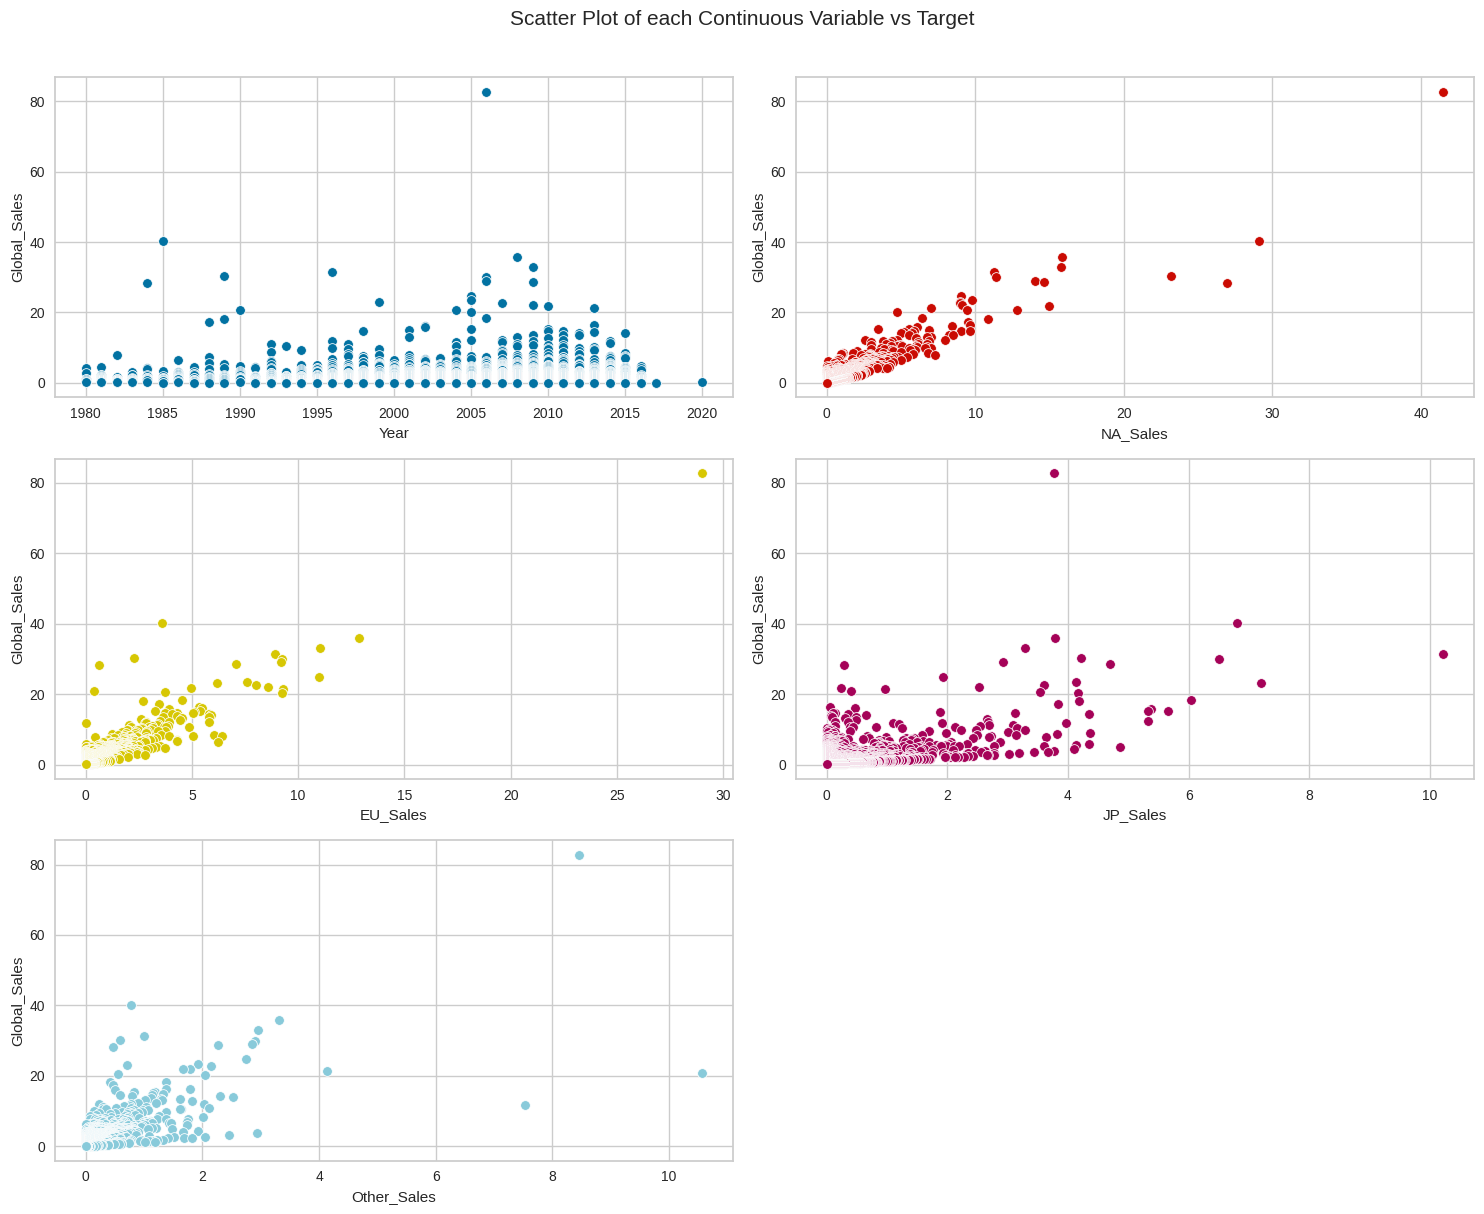

Number of All Scatter Plots = 15


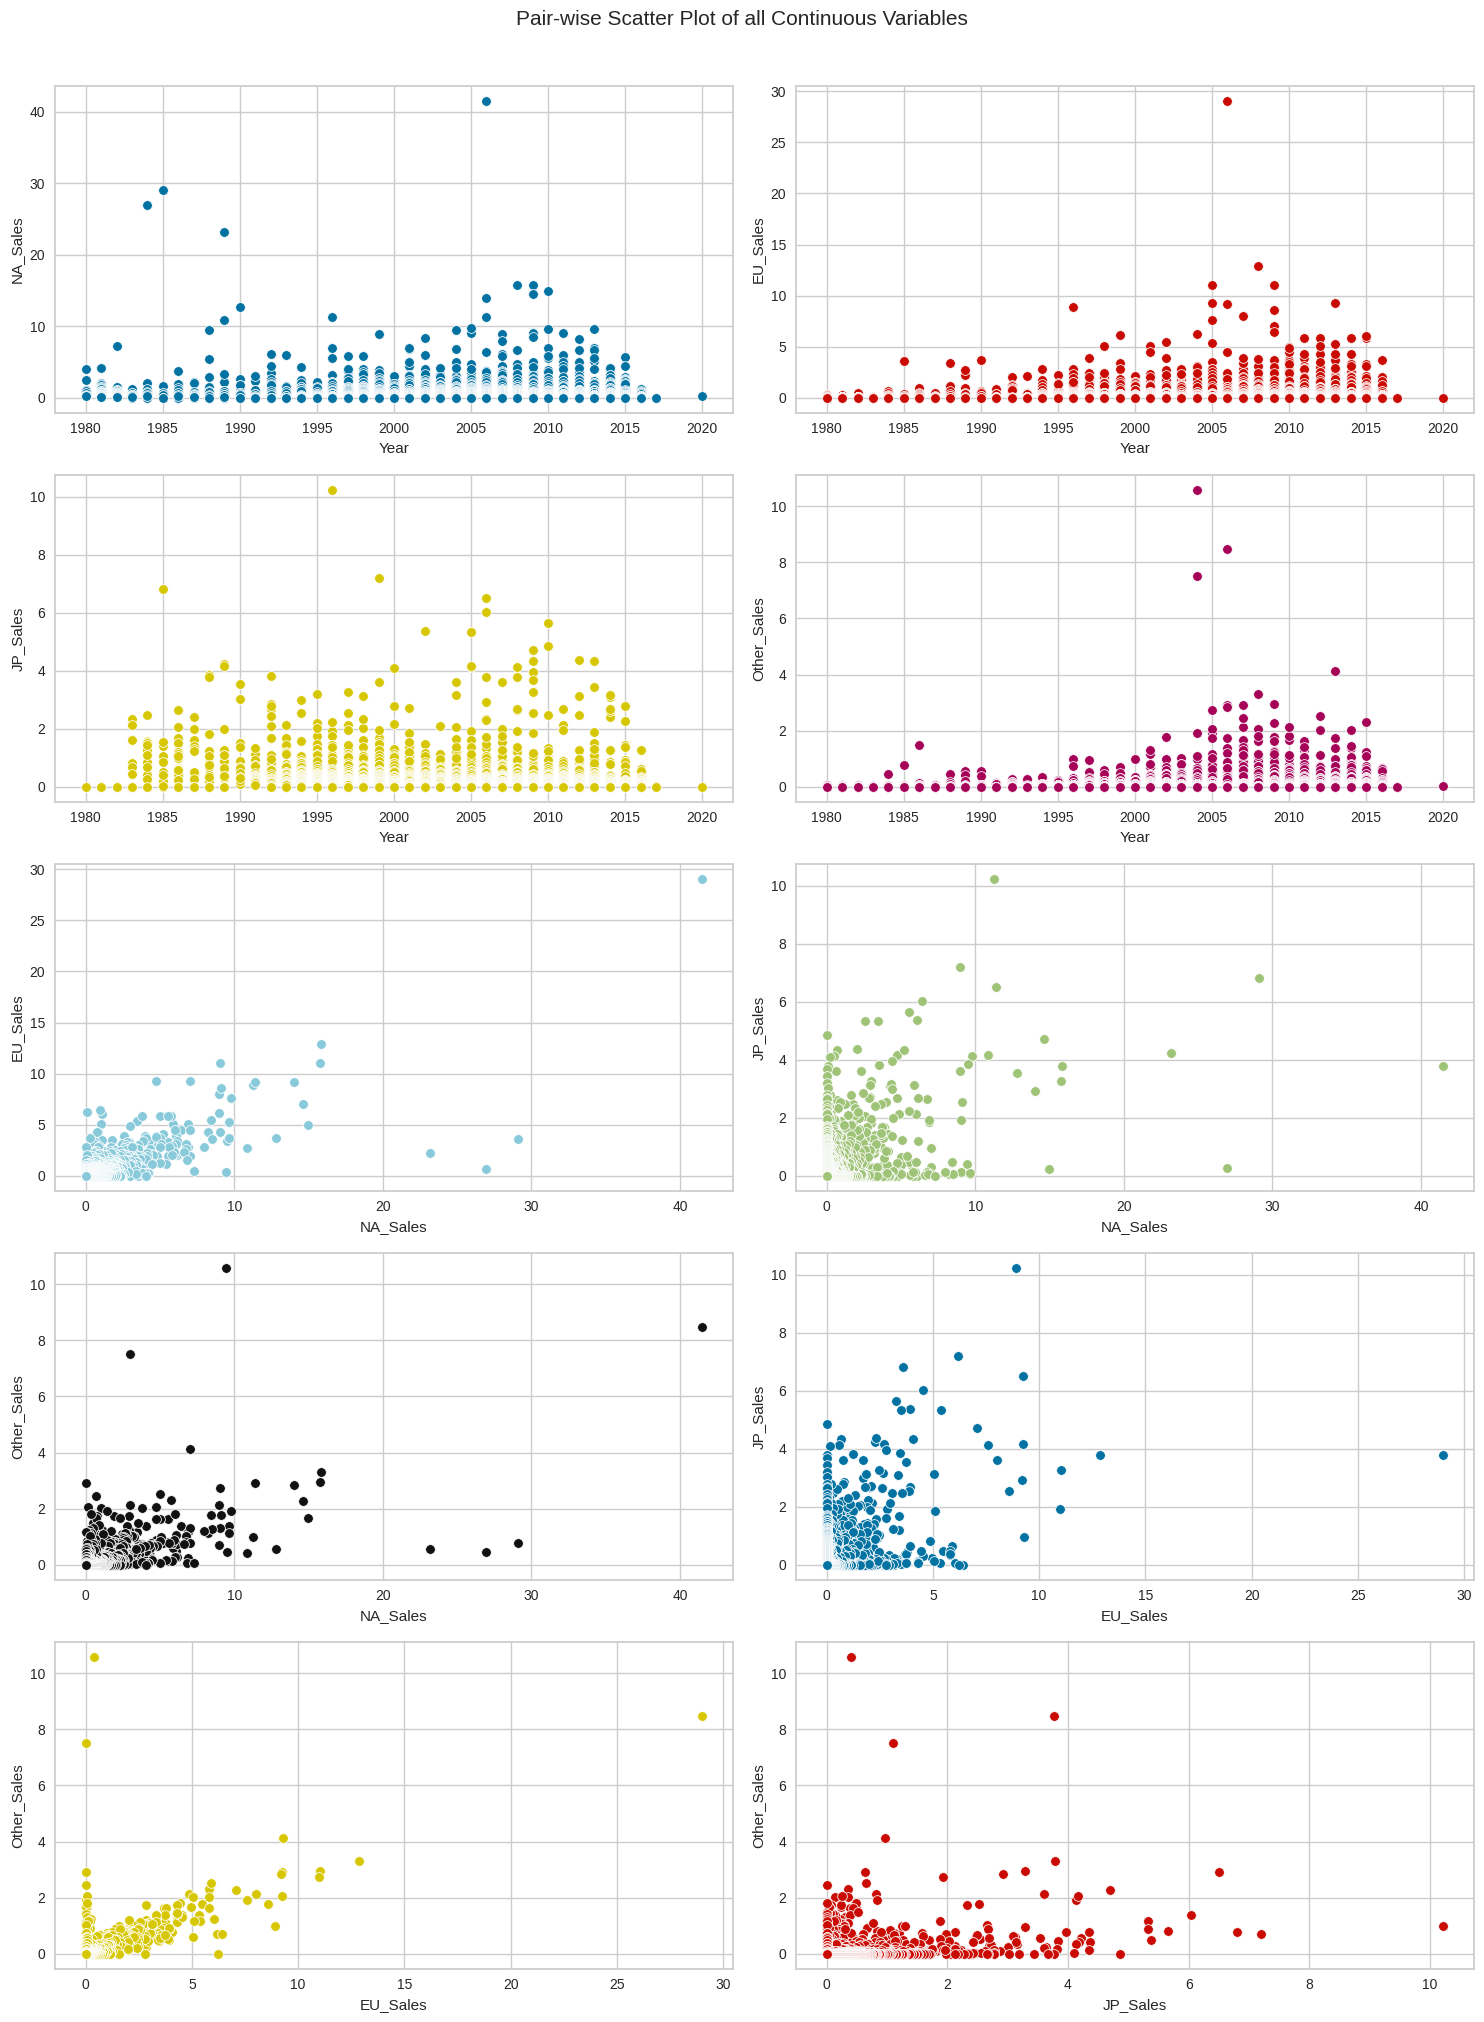

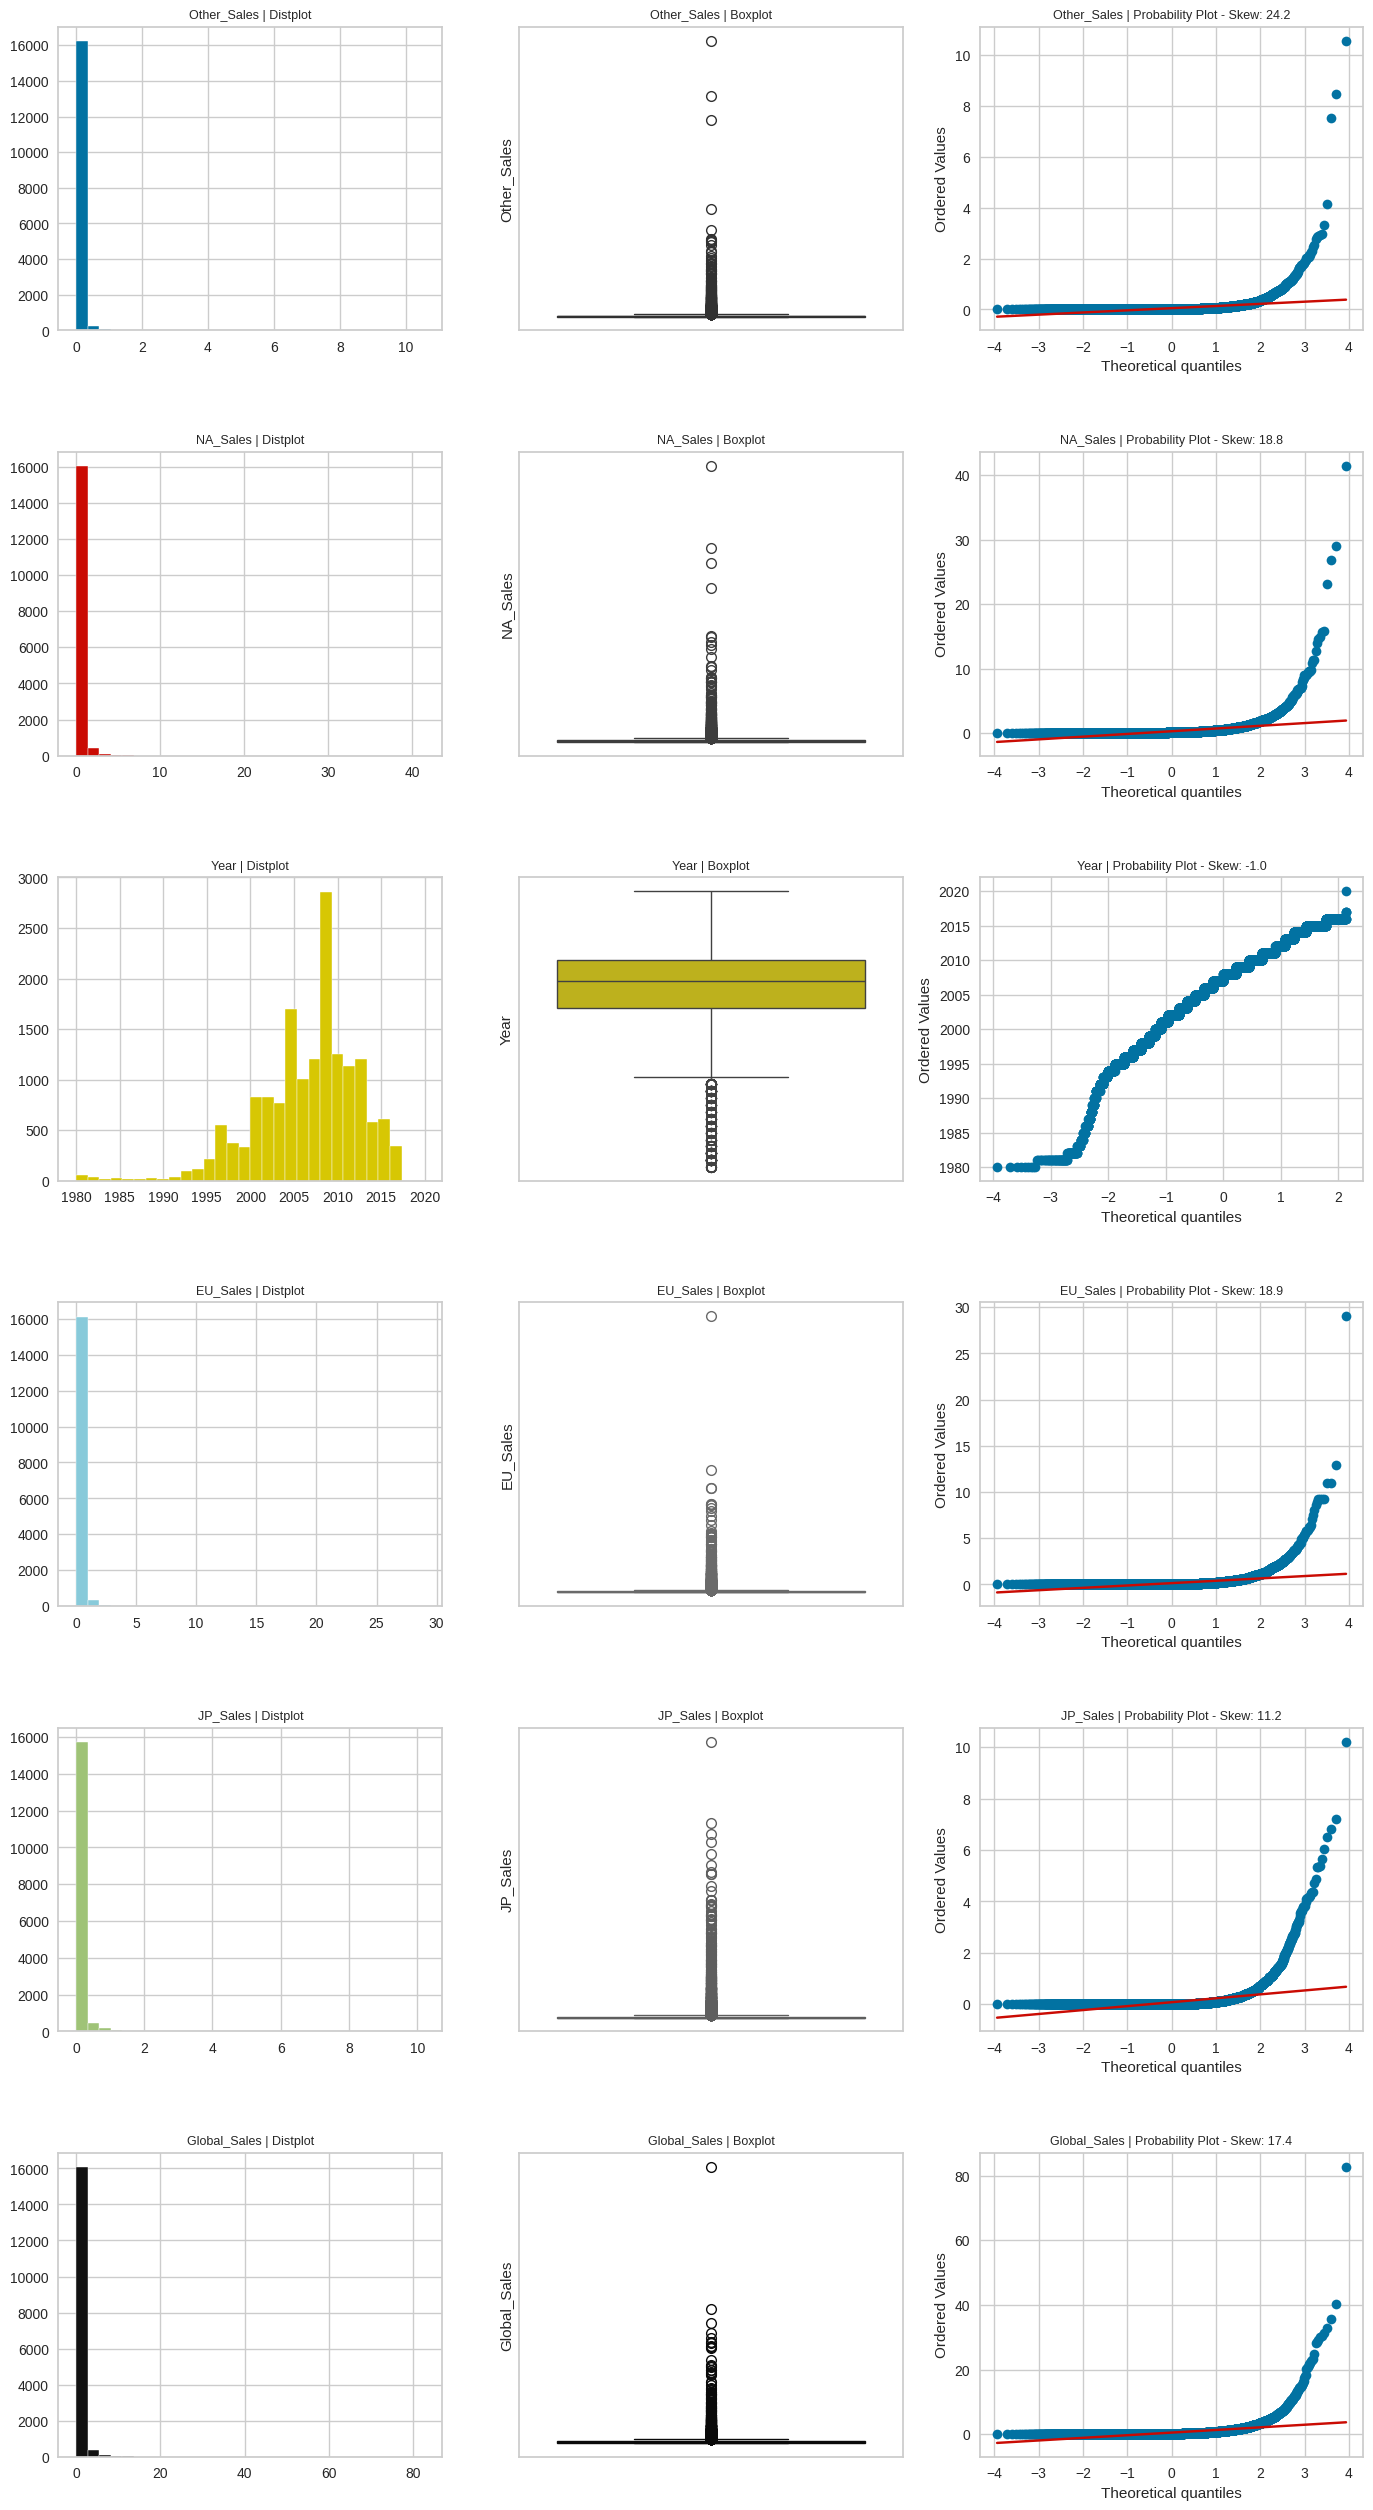

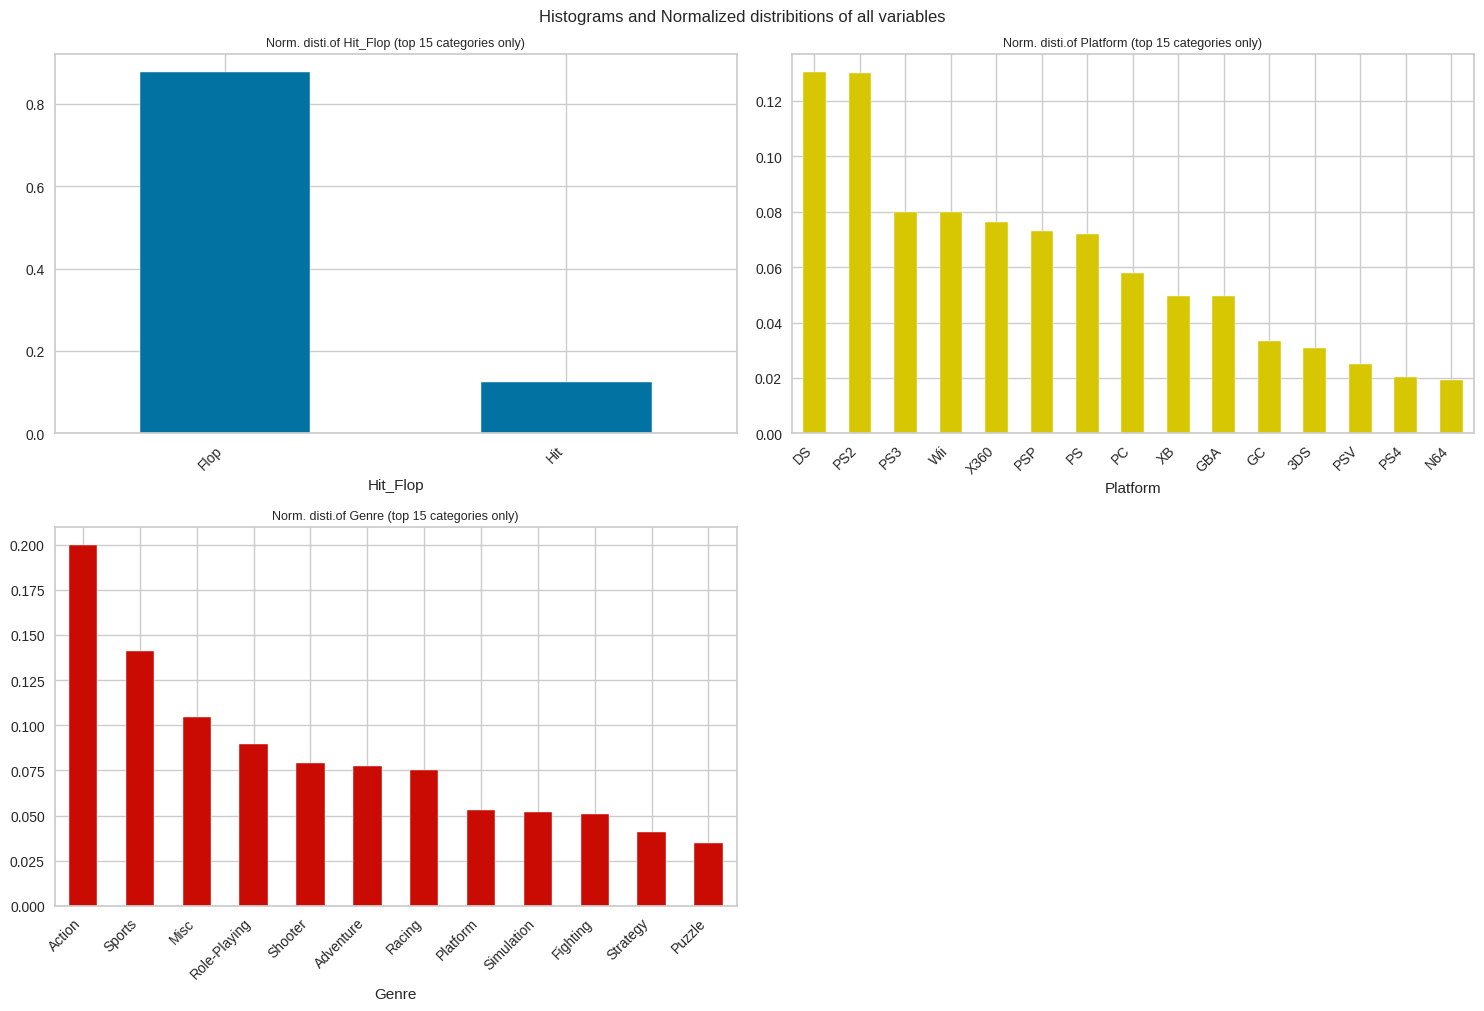

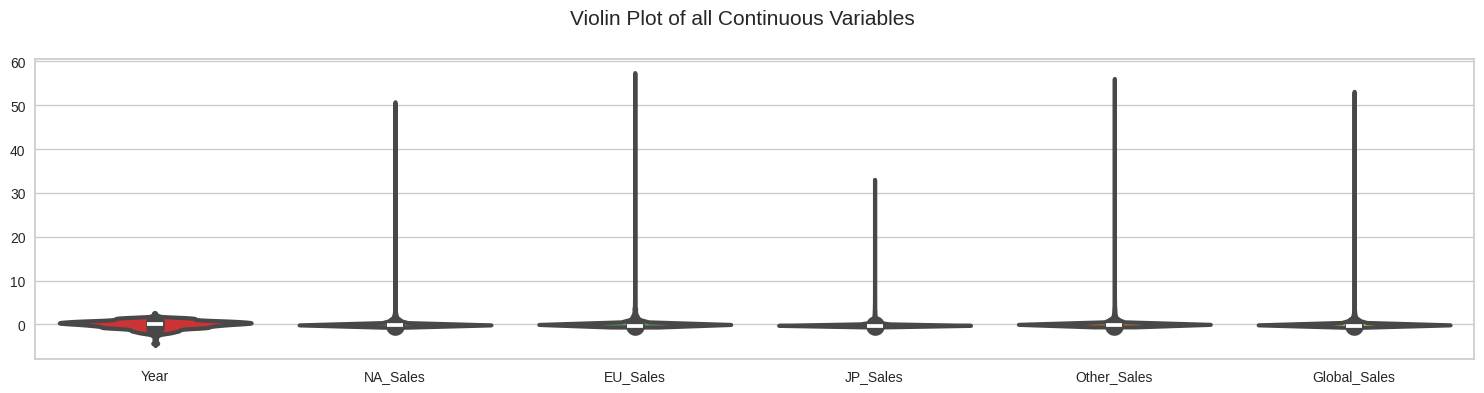

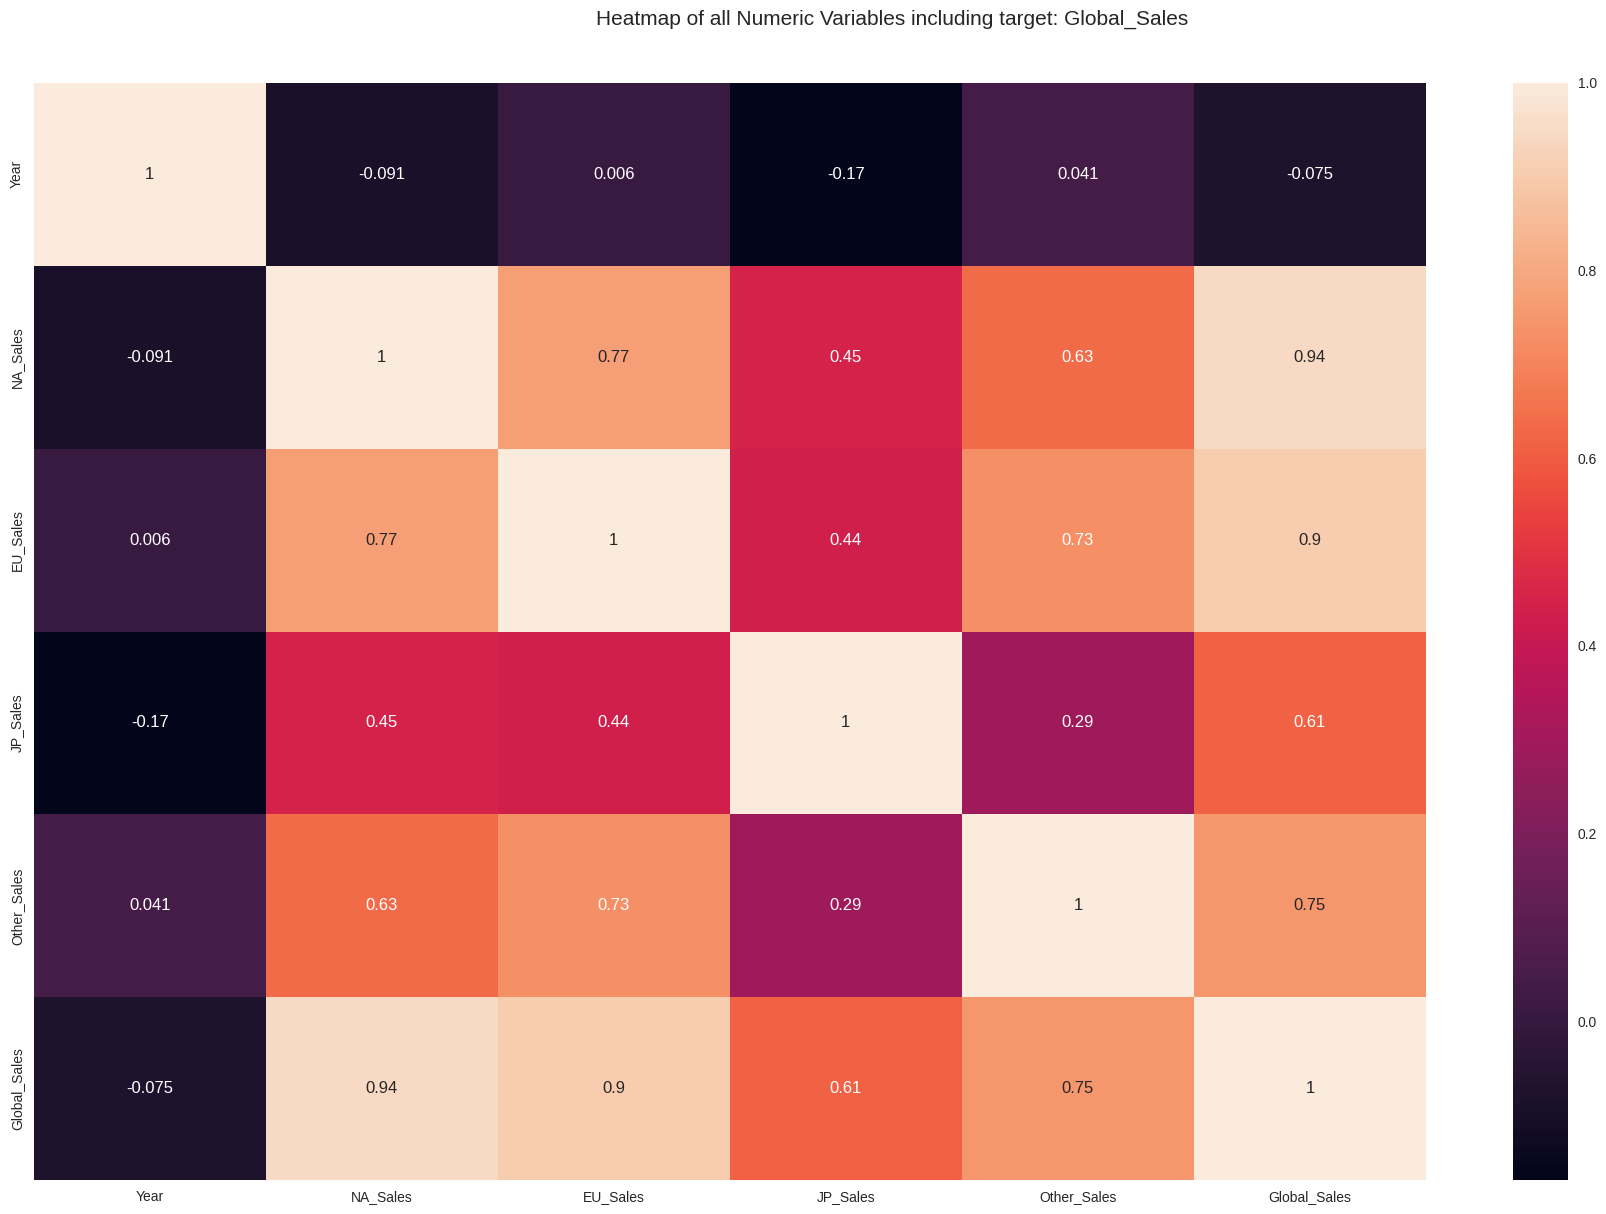

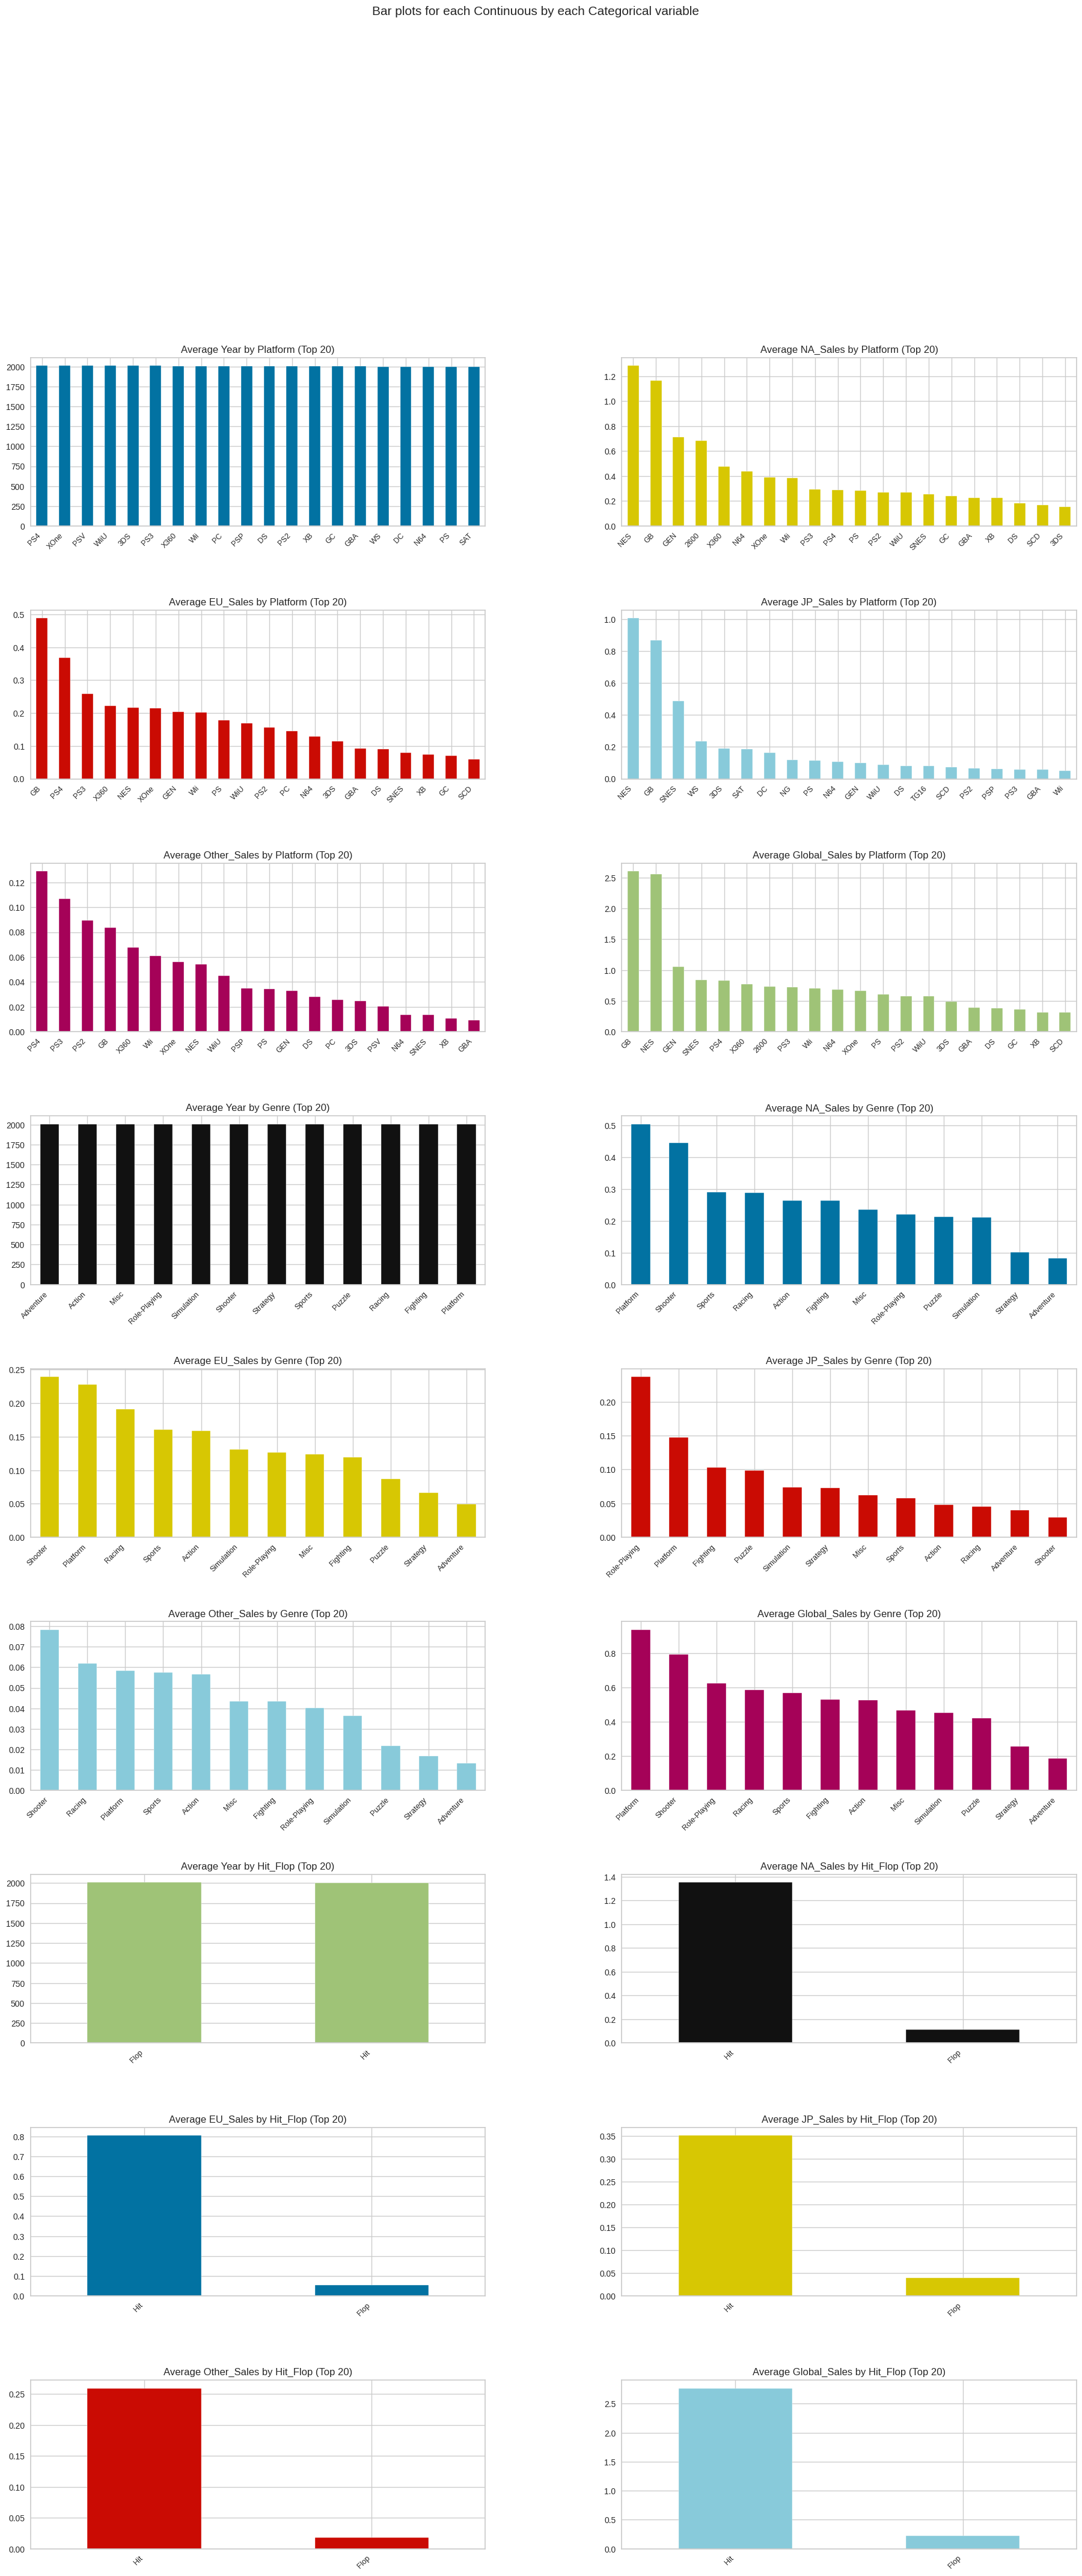

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Could not draw wordcloud plot for Name. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for Publisher. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

All Plots done
Time to run AutoViz = 21 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Hit_Flop,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,Hit,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,Hit,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,Hit,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,Hit,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,Hit,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,Flop,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,Flop,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,Flop,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,Flop,0.01


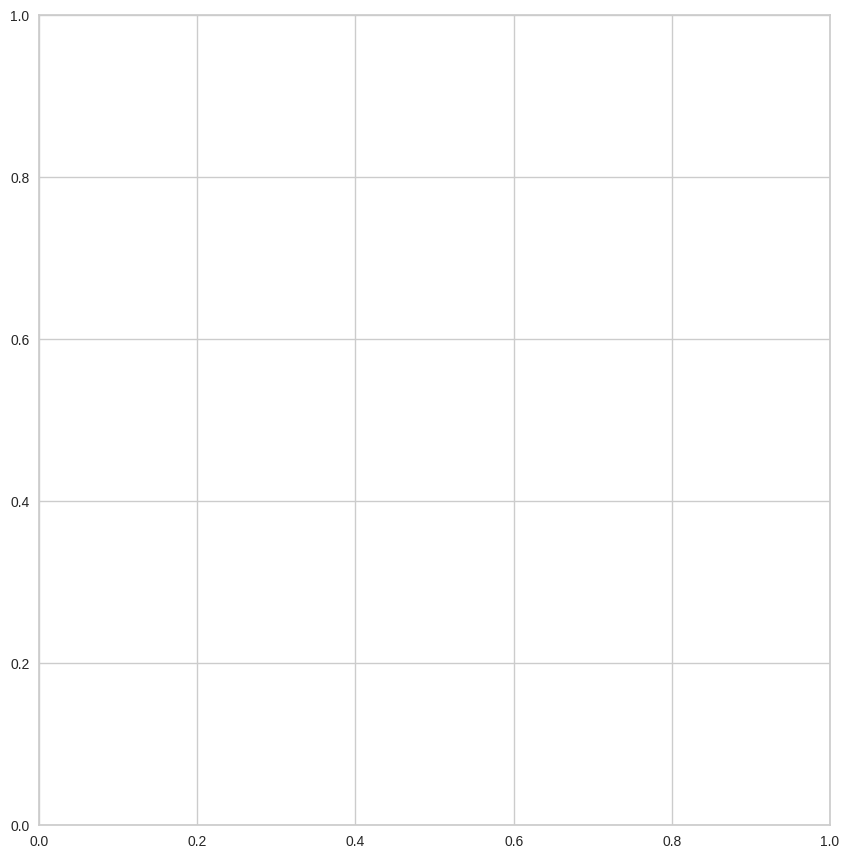

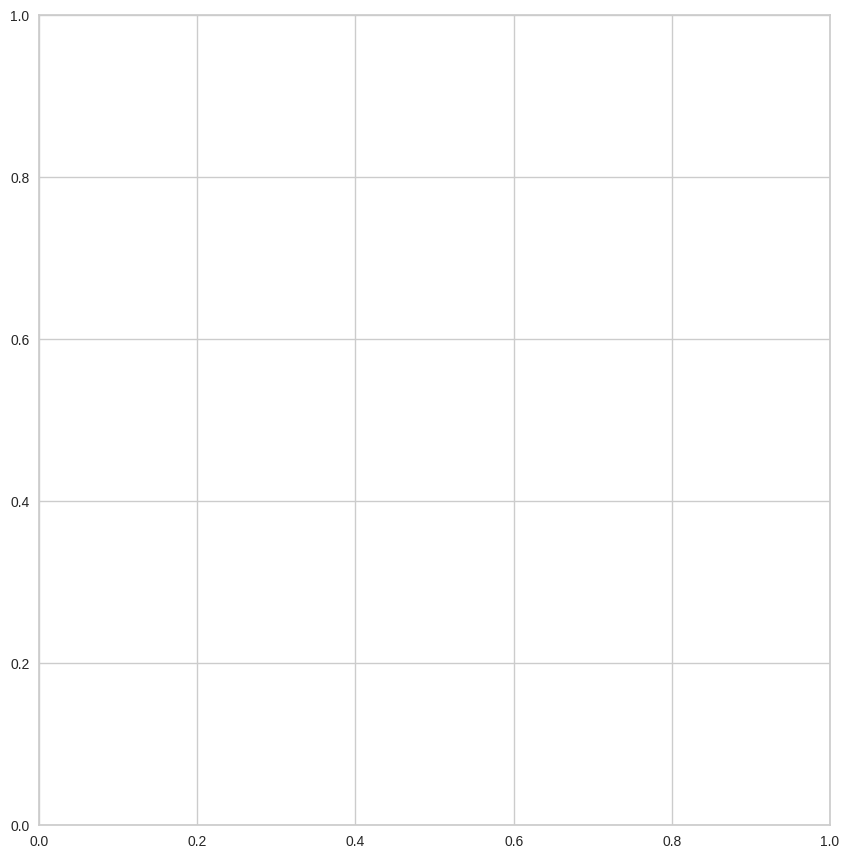

In [ ]:
# Visualize everything
AV.AutoViz(
    filename=file_path,
    sep=",",
    depVar="Global_Sales",  # or "Hit_Flop" if you've already added that column
    dfte=None
)